In [3]:
 # Dataset 2: CIFARTile

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing




In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=25,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# im.shape

# x = x.reshape((1,) + (x.shape[2],) +(x.shape[0],) +(x.shape[1],) )
# x.shape

(1, 300, 451, 3)

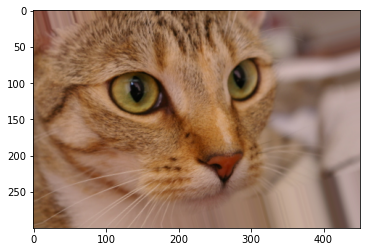

In [12]:
from skimage import data

im = data.chelsea()

plt.imshow(im)

im = data.chelsea()
im = im.reshape((1,) + im.shape)


datagen=ImageDataGenerator(rotation_range=20)
iter=datagen.flow(im,batch_size=2)
batch=iter.next()
plt.imshow(batch[0].astype('uint8'))

batch.shape


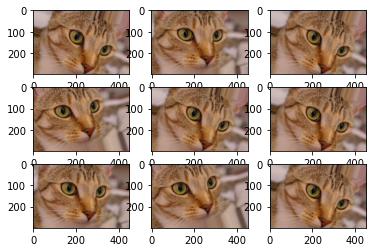

In [13]:
def plot9(imageFlow):
  for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
  	# generate batch of images
    batch = imageFlow.next()
	  # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # add image to the set. We squeeze the image here as it may be a batch of images
    plt.imshow(np.squeeze(image))
  # display the 9 images
  plt.show()


img_iter = datagen.flow(im, batch_size=1)

plot9(img_iter)



In [14]:
train_X = np.load("train_x.npy", allow_pickle=True)

train_y = np.load("train_y.npy", allow_pickle=True)

validate_X = np.load("valid_x.npy", allow_pickle=True)

validate_y = np.load("valid_y.npy", allow_pickle=True)

test_X = np.load("test_x.npy", allow_pickle=True)

test_y = np.load("test_y.npy", allow_pickle=True)




In [15]:
## Example image


def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_example(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    plt.show()






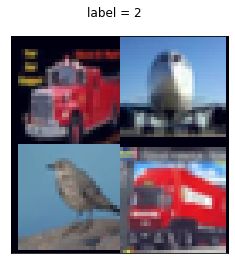

In [16]:
import random

count = train_X.shape[0]

ri = random.randrange(count)
show_example(train_X[ri], train_y[ri])




## Checking classes distribution

In [17]:
unq, counts = np.unique(train_y, return_counts= True)
print(np.asarray((unq, counts)).T)
#Sample classes looks equally distributed



[[    0 11359]
 [    1 11250]
 [    2 11264]
 [    3 11127]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


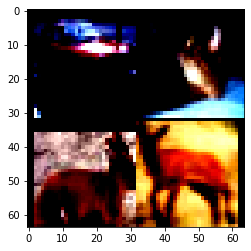

In [19]:
fig = plt.figure()
m = fig.add_subplot()
m.imshow(np.moveaxis(train_X[50],0,-1))



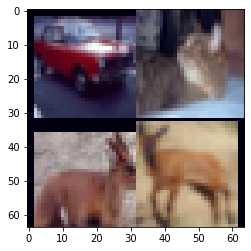

In [20]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())
fig = plt.figure()
m = fig.add_subplot()
m.imshow(image_normalization(np.moveaxis(train_X[50],0,-1)))


In [ ]:
train_nsample, train_nrgb, train_nx,train_ny = train_X.shape

train_X2 = train_X.reshape(train_nsample, train_nrgb*train_nx*train_ny)

test_nsample, test_nrgb, test_nx,test_ny = test_X.shape

test_X2 = test_X.reshape(test_nsample, test_nrgb*test_nx*test_ny)



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()  
rf_clf.fit(train_X2[0:1000,:],train_y[0:1000])
score = rf_clf.score(train_X2[0:1000,:], train_y[0:1000])
print(score)



NameError: name 'train_X2' is not defined

In [ ]:
test_score = rf_clf.score(test_X2, test_y)
print(test_score)




In [ ]:
#CV optimising

from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100,200, 500],
    'max_depth' : [3,5,7],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(train_X2[0:1000,:],train_y[0:1000])

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)




In [ ]:
rf_clf

pred = rf_clf.predict(test_X2)

rf_clf.score(test_X2,test_y)

rf2 = RandomForestClassifier(n_estimators =100, max_depth=7, max_features='log2')
rf2.fit(train_X2,train_y)

rf2.score(test_X2,test_y)

#optimised accuracy on test set = 28.97%



In [ ]:
# SVM model

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train_X2[0:5000,:], train_y[0:5000])

svm_clf.score(train_X2[0:5000,:], train_y[0:5000])

svm_clf.score(test_X2, test_y)



In [22]:
# CNN model for classification

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#train_X /= 255
train_X.shape



(45000, 3, 64, 64)

In [23]:
train_X = image_normalization(train_X)
validate_X = image_normalization(validate_X)
test_X = image_normalization(test_X)



In [24]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = True




In [25]:
train_y = keras.utils.to_categorical(train_y, num_classes)
validate_y = keras.utils.to_categorical(validate_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)




In [26]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_X.shape[1:], data_format='channels_first'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# ERROR |  ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d
### https://stackoverflow.com/questions/72413321/valueerror-one-of-the-dimensions-in-the-output-is-0-due-to-downsampling-in-c/72742906



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 64, 64)        896       
                                                                 
 activation (Activation)     (None, 32, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 62, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 30, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 31, 32)        0         
                                                        

In [27]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

validate_X.shape
###########################################

(15000, 3, 64, 64)

In [29]:
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train_X, train_y,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(validate_X, validate_y),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        rotation_range=25,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_X)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(train_X[0:5000], train_y[0:5000],
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(validate_X[0:1000],validate_y[0:1000]),
                                    workers=4)



Using real-time data augmentation.


<ipython-input-29-887605fc863a>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_X[0:5000], train_y[0:5000],


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential/conv2d/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "C:\Users\ashwi\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ashwi\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ashwi\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ashwi\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\ashwi\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\ashwi\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\ashwi\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-28-887605fc863a>", line 27, in <module>
      history = model.fit_generator(datagen.flow(train_X[0:5000], train_y[0:5000],
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\engine\training.py", line 2604, in fit_generator
      return self.fit(
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 585, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 643, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\ashwi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 519, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/conv2d/Conv2D/Conv2DBackpropFilter'
Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[{{node gradient_tape/sequential/conv2d/Conv2D/Conv2DBackpropFilter}}]] [Op:__inference_train_function_1360]

In [ ]:
pred = model.predict(test_X)

scores = model.evaluate(test_X, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


### previous results

Epoch 95/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7692 - accuracy: 0.6927 - val_loss: 1.5744 - val_accuracy: 0.2856

Epoch 96/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7678 - accuracy: 0.6951 - val_loss: 1.6140 - val_accuracy: 0.2910

Epoch 97/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7639 - accuracy: 0.6998 - val_loss: 1.5469 - val_accuracy: 0.2825

Epoch 98/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7550 - accuracy: 0.7037 - val_loss: 1.5854 - val_accuracy: 0.2806

Epoch 99/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7414 - accuracy: 0.7056 - val_loss: 1.6917 - val_accuracy: 0.2838

Epoch 100/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7398 - accuracy: 0.7092 - val_loss: 1.6005 - val_accuracy: 0.2835

Test loss: 1.6726701259613037 Test accuracy: 0.2858999967575073


>>2 ON FIRST 2 CONV layer of 64 64 i am getting last epoch accuracy of 45 val_acc 29  || test accuracy 31%


>>3 learning rate 0.001 instead 0.0001 | 51 accuracy, val  acc 28 % | test accuracy 29.3%

>>4 WITH DATA AUGMENTATION, batch_size = 100, train_x[10,000], val5000

Epoch 98/100
100/100 [==============================] - 49s 472ms/step - loss: 1.3358 - accuracy: 0.3438 - val_loss: 1.3914 - val_accuracy: 0.3138

Epoch 99/100
100/100 [==============================] - 49s 475ms/step - loss: 1.3325 - accuracy: 0.3460 - val_loss: 1.3666 - val_accuracy: 0.3080

Epoch 100/100
100/100 [==============================] - 50s 470ms/step - loss: 1.3325 - accuracy: 0.3500 - val_loss: 1.3597 - val_accuracy: 0.3166

Test loss: 1.3803764581680298
Test accuracy: 0.30809998512268066